In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-data-simulation-it-industry/employee_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/employee-data-simulation-it-industry/employee_data.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
...,...,...,...,...,...
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996


In [5]:
df.isna().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [7]:
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [8]:
df.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


In [9]:
df.nunique()

ID                    400
Gender                  2
Experience (Years)     21
Position               11
Salary                400
dtype: int64

In [10]:
df.iloc[100:130,0:4]

,ID,Gender,Experience (Years),Position
100,101,M,4,IT Support Specialist
101,102,M,1,DevOps Engineer
102,103,F,3,IT Support Specialist
103,104,M,9,Cloud Solutions Architect
104,105,F,16,Systems Analyst
105,106,M,3,Database Administrator (DBA)
106,107,M,6,IT Security Analyst
107,108,M,14,IT Manager
108,109,M,2,Software Engineer
109,110,M,14,Database Administrator (DBA)


In [11]:
df['Gender'].value_counts()

Gender
M    202
F    198
Name: count, dtype: int64

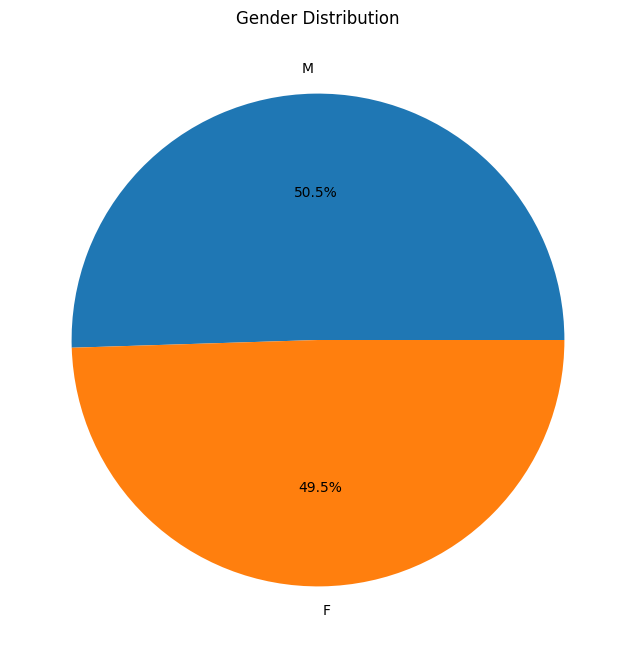

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [13]:
df['Position'].value_counts()

Position
Web Developer                   43
IT Manager                      40
IT Security Analyst             39
Systems Administrator           38
Database Administrator (DBA)    38
DevOps Engineer                 37
Systems Analyst                 37
Software Engineer               36
Network Administrator           31
IT Support Specialist           31
Cloud Solutions Architect       30
Name: count, dtype: int64

In [14]:
df['Salary'].describe()

count       400.00000
mean     131701.19750
std       43351.50899
min       43643.00000
25%      100484.75000
50%      128561.50000
75%      157735.00000
max      269950.00000
Name: Salary, dtype: float64

In [15]:
df['Experience (Years)'].describe()

count    400.000000
mean       9.670000
std        6.101571
min        0.000000
25%        4.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Experience (Years), dtype: float64

In [16]:
df.groupby(['Gender'])['Position'].value_counts()

Gender  Position                    
F       Systems Analyst                 22
        Web Developer                   22
        IT Manager                      20
        Software Engineer               18
        Systems Administrator           18
        Cloud Solutions Architect       17
        DevOps Engineer                 17
        IT Security Analyst             17
        IT Support Specialist           17
        Database Administrator (DBA)    16
        Network Administrator           14
M       Database Administrator (DBA)    22
        IT Security Analyst             22
        Web Developer                   21
        DevOps Engineer                 20
        IT Manager                      20
        Systems Administrator           20
        Software Engineer               18
        Network Administrator           17
        Systems Analyst                 15
        IT Support Specialist           14
        Cloud Solutions Architect       13
Name: count, dtyp

In [17]:
df.groupby(['Gender'])['Salary'].mean()

Gender
F    132629.974747
M    130790.811881
Name: Salary, dtype: float64

In [18]:
df.groupby(['Position'])['Salary'].mean()

Position
Cloud Solutions Architect       160841.633333
Database Administrator (DBA)    132864.552632
DevOps Engineer                 161859.081081
IT Manager                      170711.550000
IT Security Analyst             134440.820513
IT Support Specialist            87683.806452
Network Administrator           116865.064516
Software Engineer               131357.416667
Systems Administrator           113117.447368
Systems Analyst                 127658.189189
Web Developer                   108238.116279
Name: Salary, dtype: float64

In [19]:
df[(df['Salary'] < 50000)]

,ID,Gender,Experience (Years),Position,Salary
64,65,M,2,IT Support Specialist,48710
111,112,F,1,IT Support Specialist,43643
147,148,F,1,IT Support Specialist,49817


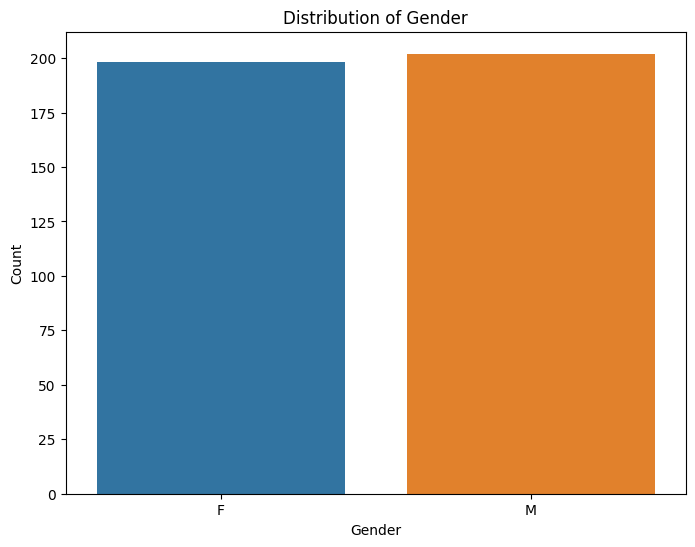

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


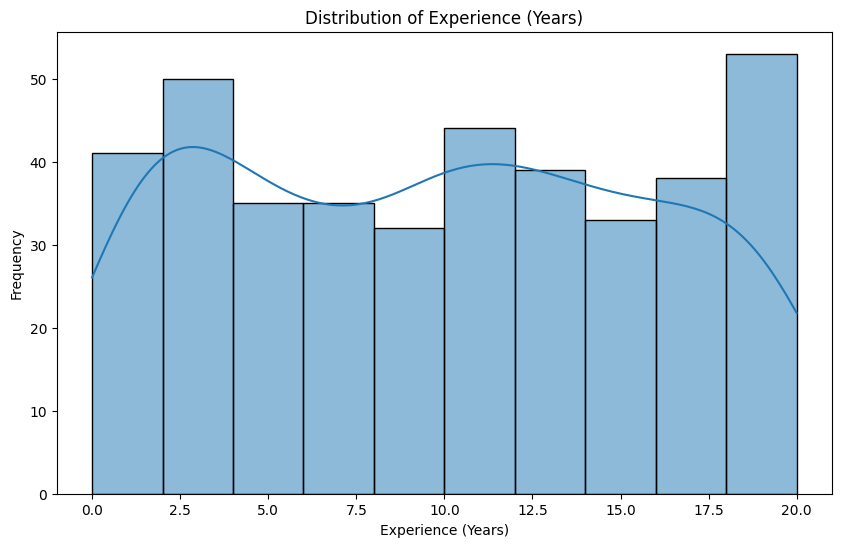

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Experience (Years)'], kde=True)
plt.title('Distribution of Experience (Years)')
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


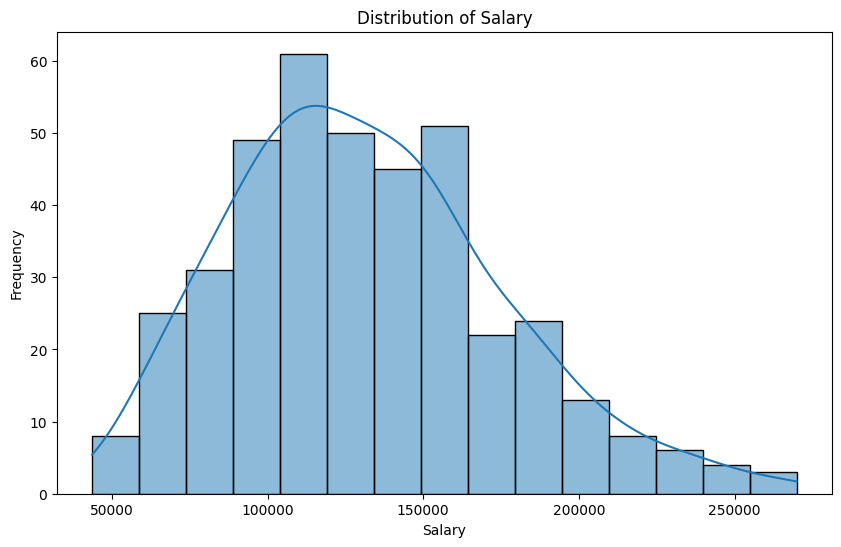

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [23]:
df.corr(numeric_only=True)

,ID,Experience (Years),Salary
ID,1.000000,0.067305,0.00868
Experience (Years),0.067305,1.000000,0.61853
Salary,0.008680,0.618530,1.00000


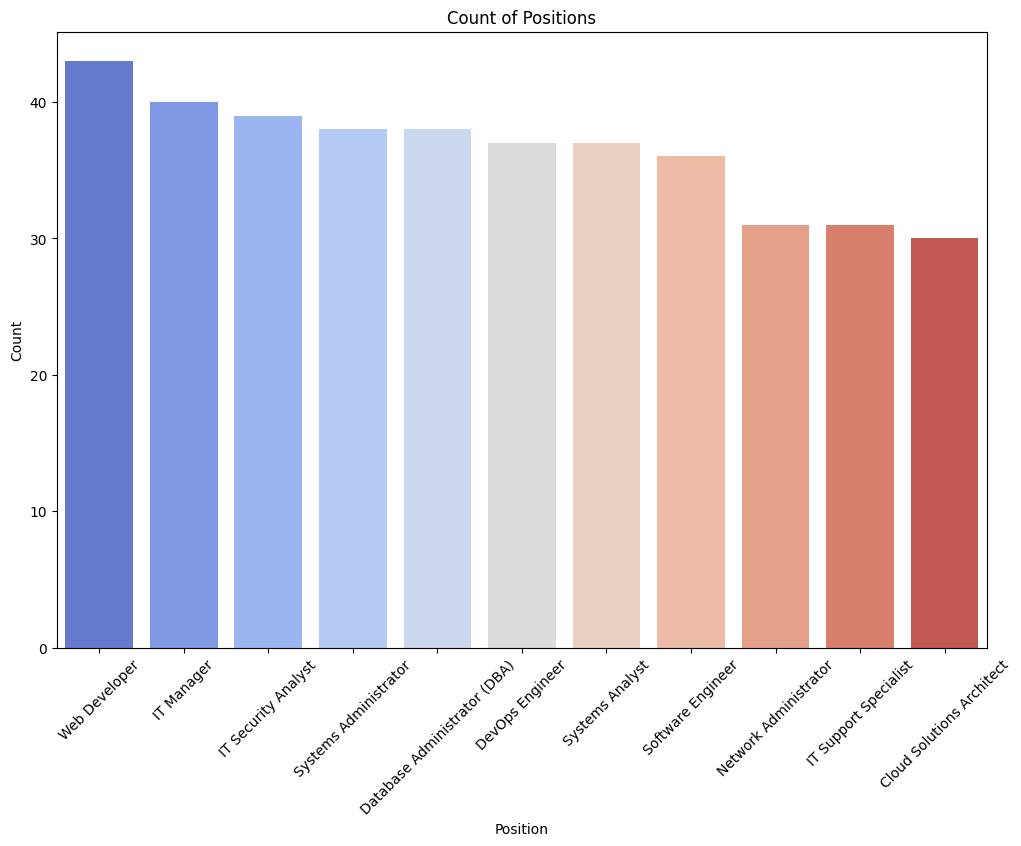

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Position', palette='coolwarm',order=df['Position'].value_counts().index)
plt.title('Count of Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
df.groupby('Position')['Salary'].mean().reset_index()

,Position,Salary
0,Cloud Solutions Architect,160841.633333
1,Database Administrator (DBA),132864.552632
2,DevOps Engineer,161859.081081
3,IT Manager,170711.550000
4,IT Security Analyst,134440.820513
5,IT Support Specialist,87683.806452
6,Network Administrator,116865.064516
7,Software Engineer,131357.416667
8,Systems Administrator,113117.447368
9,Systems Analyst,127658.189189


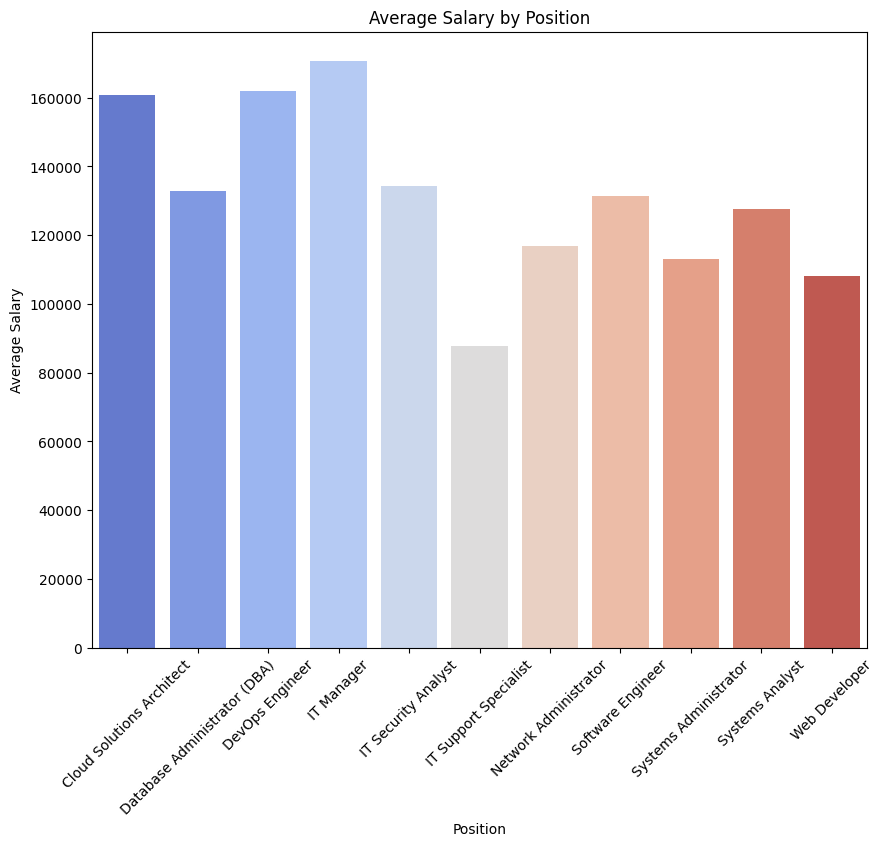

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(data= df.groupby('Position')['Salary'].mean().reset_index(), x='Position', y='Salary', palette='coolwarm')
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [27]:
df.groupby('Gender')['Salary'].mean().reset_index()

,Gender,Salary
0,F,132629.974747
1,M,130790.811881


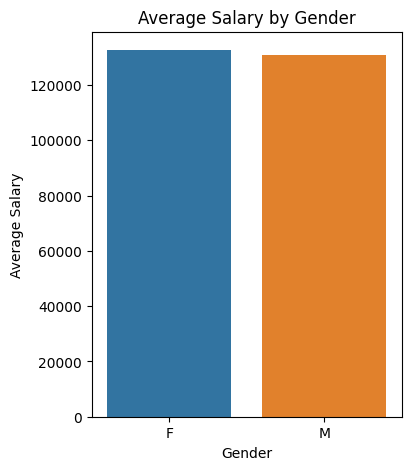

In [28]:
plt.figure(figsize=(4, 5))
sns.barplot(data=df.groupby('Gender')['Salary'].mean().reset_index(), x='Gender', y='Salary')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

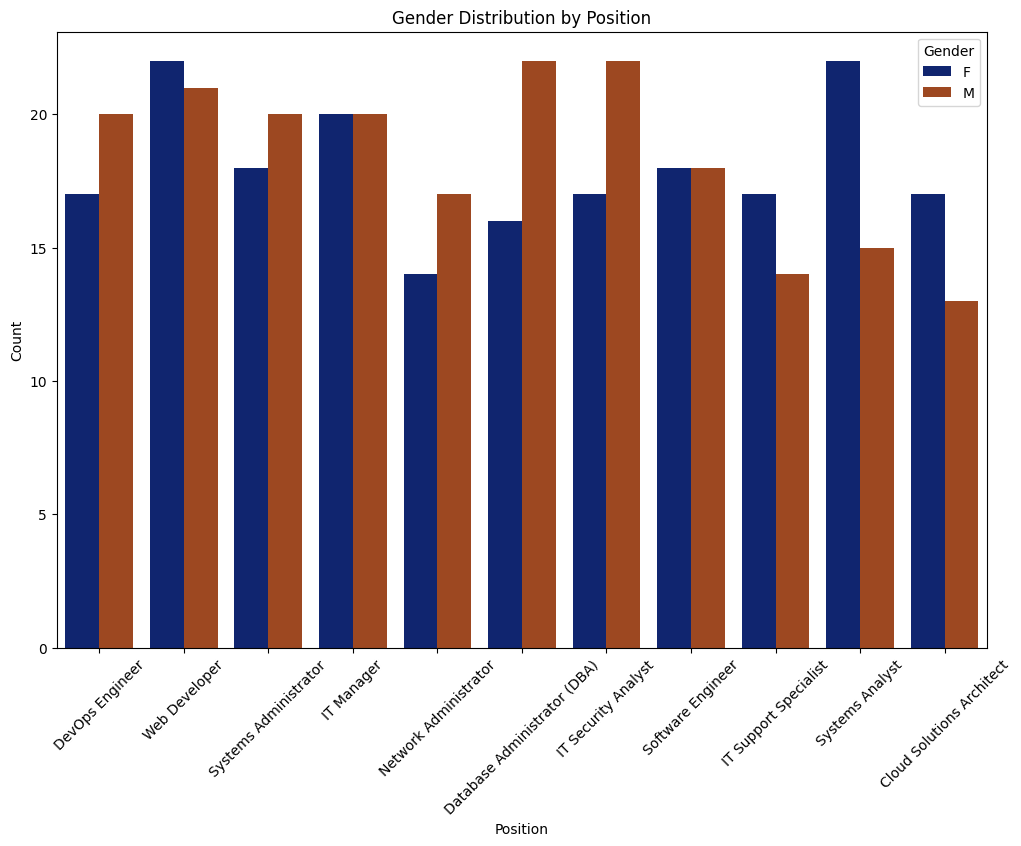

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Position', hue='Gender', palette='dark')
plt.title('Gender Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()